<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Model Evaluation Techniques on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Data Preparation for Model Training](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets](#section402)<br>
    
5. [Random Forest](#section5)<br>
    - 5.1 [Random Forest in scikit learn](#section501)<br>
    - 5.2 [Using the Model for Prediction](#section502)<br> 
    - 5.3 [Model evaluation for Random Forest](#section503)<br>   
    - 5.4 [Precision, Recall and F-1 Score](#section504)<br> 
    - 5.5 [Classification Report](#section505)<br> 
    - 5.6 [Model Evaluation using AUC ROC](#section506)<br>
6. [Cross Validation](#section6)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()


/Users/neelmanigupta/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv

In [4]:
#data = pd.read_csv('titanic_data.csv')

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
final_col = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [7]:
data = data[final_col]

In [8]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Port of embarkation                                       |

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ and __Fare__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.

In [10]:
# Finding the distribution of Embarked across unique values
data.groupby(['Embarked'])['Embarked'].count()

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

In [11]:
data.Embarked.mode()

0    S
dtype: object

In [12]:
# Finding the mode of Embarked
data['Embarked'].mode()[0]

'S'

In [13]:
# Filling Null values of Embarked with its mode
data.Embarked = data.Embarked.fillna(data['Embarked'].mode())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
data.Age.fillna(data.Age.median(), inplace = True)
data.Fare.fillna(data.Fare.median(), inplace = True)

In [16]:
data.drop('Cabin', axis = 1,inplace = True)

In [17]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [18]:
# Creating a new feature/column : "Family Size". By adding the number of children and parents
data['FamilySize'] = data['SibSp'] + data['Parch']+1

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [20]:
drop_cols = ['Name','Ticket','SibSp','Parch','PassengerId']

In [21]:
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
5,0,3,male,28.0,8.4583,Q,1
6,0,1,male,54.0,51.8625,S,1
7,0,3,male,2.0,21.0750,S,5
8,1,3,female,27.0,11.1333,S,3
9,1,2,female,14.0,30.0708,C,2


## EDA

In [22]:
# how many people survived
data['Survived'].sum()

342

In [23]:
data.shape[0]

891

In [24]:
# % of people survived
data['Survived'].sum()/data.shape[0]

0.3838383838383838

In [25]:
# what is the distribution of male and female
data.groupby(['Sex'])['Sex'].count().sort_values(ascending=False)#.plot('bar')

Sex
male      577
female    314
Name: Sex, dtype: int64

In [26]:
# From where did the people embark
data.groupby(['Embarked'])['Embarked'].count().sort_values(ascending=False)

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# How many people stayed in each of the classes
data.groupby(['Pclass'])['Pclass'].count().sort_values(ascending=False)

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [29]:
data.groupby(['Embarked'])['Survived'].sum().sort_values(ascending=False)

Embarked
S    217
C     93
Q     30
Name: Survived, dtype: int64

In [30]:
data.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [31]:
data.FamilySize.sum()

1697

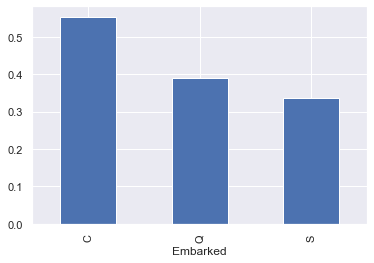

In [32]:
(data.groupby(['Embarked'])['Survived'].sum()/data.groupby(['Embarked'])['Survived'].count()).plot(kind ='bar')

In [33]:
data.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

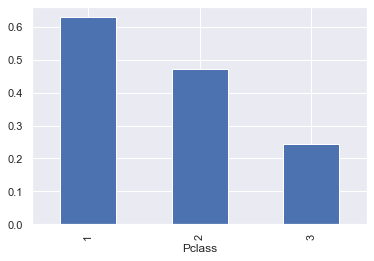

In [34]:
(data.groupby(['Pclass'])['Survived'].sum()/data.groupby(['Pclass'])['Survived'].count()).plot(kind='bar')

In [35]:
data['Fare'].mean()

32.204207968574636

In [36]:
#data['combination'] = data['Embarked'].astype(str) + '-' + data['Pclass'].astype(str)

In [37]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [38]:
data.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [39]:
data.groupby(['Survived'])['Age'].mean()

Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

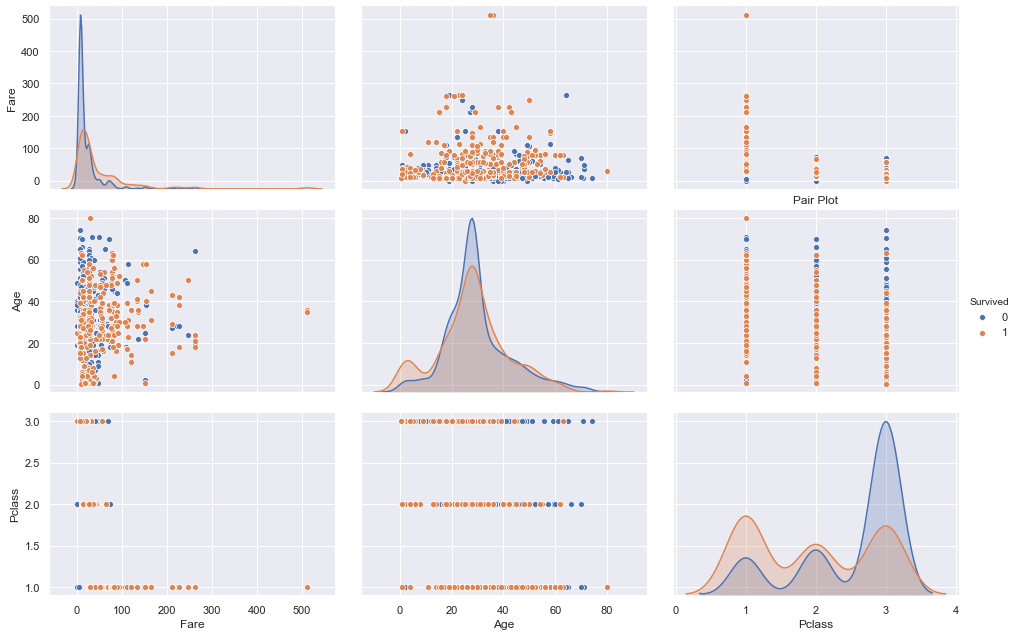

In [40]:
sns.pairplot(data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],\
                                                             hue="Survived", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

# Creating dummy variables for our categorical variables

In [41]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [42]:
cat_cols = ['Sex','Embarked']

In [43]:
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [44]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

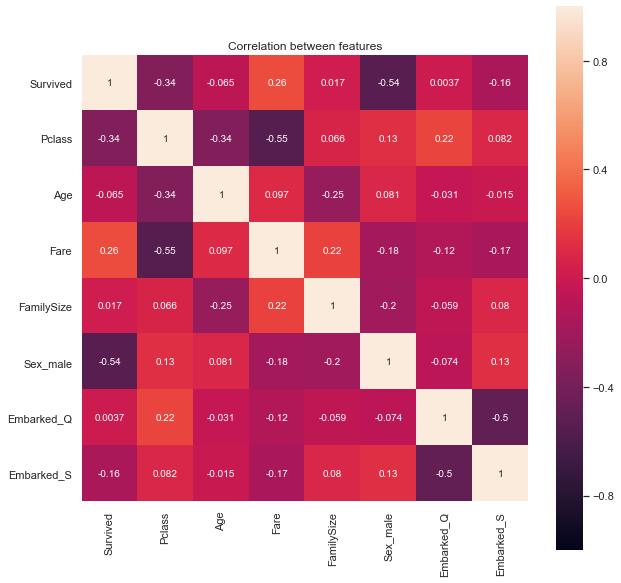

In [45]:
corr = data_with_dummies.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- __Fare and FamilySize__ are __positively coorelated with Survived.__

<a id=section4></a>

## 4. Data Preparation for Model Training

<a id=section401></a>

## 4.1 Preparing X and y using pandas

In [46]:
data_with_dummies.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,1
1,1,1,38.0,71.2833,2,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


In [47]:
data_with_dummies.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male','Embarked_Q', 'Embarked_S']

target = ['Survived']

In [49]:
X = data_with_dummies[features]
y = data_with_dummies[target]

<a id=section405></a>

<a id=section402></a>

## 4.2 Splitting X and y into training and test datasets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [51]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (712, 7)
y_train shape:  (712, 1)

Test cases as below
X_test shape:  (179, 7)
y_test shape:  (179, 1)


<a id = section5></a>

## 5 Random Forest

<a id = section501></a>

## 5.1 Random Forest in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

- __Model without parameter specification__

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

<a id=section502></a>

## 5.2 Using the Model for Prediction

In [53]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

- Now lets see some model evaluation techniques.

<a id = section503></a>

## 5.3 Model evaluation for Random Forest

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

### Model Evaluation using __accuracy_score__

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for train data for RF is:', accuracy_train_rf)
print('Accuracy score for test data for RF is:', accuracy_test_rf)

Accuracy score for train data for RF is: 0.9873595505617978
Accuracy score for test data for RF is: 0.776536312849162


### Model Evaluation using confusion matrix

In [55]:
c_matrix_train_rf = pd.DataFrame(confusion_matrix(y_train, y_pred_train_rf))
c_matrix_train_rf.index = ['Actual Died','Actual Survived']
c_matrix_train_rf.columns = ['Predicted Died','Predicted Survived']
print("Confusion Mateix for RF for Train set\n",c_matrix_train_rf)

Confusion Mateix for RF for Train set
                  Predicted Died  Predicted Survived
Actual Died                 438                   5
Actual Survived               4                 265


This means 438 + 265 = __703 correct predictions__ & 4 + 5 = __9 false predictions__.

In [56]:
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual Died','Actual Survived']
c_matrix_test_rf.columns = ['Predicted Died','Predicted Survived']
print("Confusion Matrix for RF for test set\n",c_matrix_test_rf)

Confusion Matrix for RF for test set
                  Predicted Died  Predicted Survived
Actual Died                  94                  12
Actual Survived              28                  45


This means 94 + 45 = __139 correct predictions__ & 28 + 12 = __40 false predictions__.

<a id = section504></a>

## 5.4 Precision, Recall and F1 Score

In [57]:
# Precision
from sklearn.metrics import precision_score
precision_train = precision_score(y_train,y_pred_train_rf)
precision_test = precision_score(y_test,y_pred_test_rf)
print('Precision score for train data:', precision_train)
print('Precision score for test data:', precision_test)


Precision score for train data: 0.9814814814814815
Precision score for test data: 0.7894736842105263


In [58]:
# Recall
from sklearn.metrics import recall_score
print('Recall score for train data:',recall_score(y_train,y_pred_train_rf))   
print('Recall score for test data:',recall_score(y_test,y_pred_test_rf))


Recall score for train data: 0.9851301115241635
Recall score for test data: 0.6164383561643836


In [59]:
from sklearn.metrics import f1_score
print('F1_score for train data:',f1_score(y_train,y_pred_train_rf))
print('F1_score for test data:',f1_score(y_test,y_pred_test_rf))

F1_score for train data: 0.9833024118738405
F1_score for test data: 0.6923076923076923


<a id = section505></a>

## 5.5 Classification Report

In [60]:
# For Train Data
from sklearn.metrics import classification_report
c_report_train_rf = classification_report(y_train, y_pred_train_rf)
print("Classfication for Train set\n",c_report_train_rf)

Classfication for Train set
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       443
           1       0.98      0.99      0.98       269

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712



In [61]:
# For Test Data
from sklearn.metrics import classification_report
c_report_test_rf = classification_report(y_test, y_pred_test_rf)
print("Classfication for Test set\n",c_report_test_rf)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       106
           1       0.79      0.62      0.69        73

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179



### Hyper parameter for RF tuning using RANDOM SEARCH

In [62]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [63]:
model_rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]})

- Using the model for __prediction__

In [64]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

In [65]:
# Precision
precision_tuned = precision_score(y_test,y_pred_test_rf_tuned)
print('Precision score for normally tuned model for test data:', precision_tuned)

Precision score for normally tuned model for test data: 0.8478260869565217


In [66]:
# For Train Data
from sklearn.metrics import classification_report
c_report_train_rf_tuned = classification_report(y_train, y_pred_train_rf_tuned)
print("Classfication for train set\n",c_report_train_rf_tuned)

Classfication for train set
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       443
           1       0.92      0.70      0.79       269

    accuracy                           0.86       712
   macro avg       0.88      0.83      0.85       712
weighted avg       0.87      0.86      0.86       712



In [67]:
# For Test Data
from sklearn.metrics import classification_report
c_report_test_rf_tuned = classification_report(y_test, y_pred_test_rf_tuned)
print("Classfication for Test set\n",c_report_test_rf_tuned)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       106
           1       0.85      0.53      0.66        73

    accuracy                           0.77       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.77      0.76       179



### Hyper parameter for RF tuning using RANDOM SEARCH for Precision

In [68]:
from sklearn.model_selection import RandomizedSearchCV
# parameters for RandomSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
# run randomized search
n_iter_search = 100
model_rf_tuned_new = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1,
                                   scoring = 'precision')

In [69]:
model_rf_tuned_new.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]},
                   scoring='precision')

- Using the model for __prediction__

In [70]:
y_pred_test_rf_tuned_new = model_rf_tuned_new.predict(X_test)
y_pred_train_rf_tuned_new = model_rf_tuned_new.predict(X_train)

In [71]:
# Precision
precision_tuned_new = precision_score(y_test,y_pred_test_rf_tuned_new)
print('Precision score for Precision tuned model for test data:', precision_tuned_new)

Precision score for Precision tuned model for test data: 0.8947368421052632


In [72]:
# For Train Data
from sklearn.metrics import classification_report
c_report_train_rf_tuned_new = classification_report(y_train, y_pred_train_rf_tuned_new)
print("Classfication for Test set\n",c_report_train_rf_tuned_new)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       443
           1       0.95      0.54      0.68       269

    accuracy                           0.81       712
   macro avg       0.86      0.76      0.78       712
weighted avg       0.84      0.81      0.80       712



In [73]:
# For Test Data
from sklearn.metrics import classification_report
c_report_test_rf_tuned_new = classification_report(y_test, y_pred_test_rf_tuned_new)
print("Classfication for Test set\n",c_report_test_rf_tuned_new)

Classfication for Test set
               precision    recall  f1-score   support

           0       0.72      0.96      0.83       106
           1       0.89      0.47      0.61        73

    accuracy                           0.76       179
   macro avg       0.81      0.71      0.72       179
weighted avg       0.79      0.76      0.74       179



In [74]:
print(c_report_test_rf_tuned)

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       106
           1       0.85      0.53      0.66        73

    accuracy                           0.77       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.77      0.76       179



<a id = section506></a>

## 5.6 Model evaluation using ROC_AUC curve

__For the not-tuned model__

In [75]:
from sklearn import metrics
probs_train = model_rf.predict_proba(X_train)

In [76]:
probs_train

array([[0.29, 0.71],
       [0.01, 0.99],
       [0.01, 0.99],
       ...,
       [0.96, 0.04],
       [0.85, 0.15],
       [0.99, 0.01]])

In [77]:
preds_train = probs_train[:,1]

In [78]:
preds_train

array([0.71      , 0.99      , 0.99      , 0.02      , 0.69      ,
       0.99      , 0.03      , 0.        , 0.96      , 0.        ,
       0.86      , 0.01      , 0.11      , 0.83258586, 0.91      ,
       0.19      , 0.99      , 0.        , 0.99166667, 0.        ,
       0.1       , 0.1       , 1.        , 0.00333333, 0.1       ,
       0.81      , 0.59816667, 0.99      , 0.        , 0.50366667,
       0.06416667, 1.        , 0.08      , 0.06652381, 0.13      ,
       0.62      , 0.        , 0.01      , 0.99      , 0.91      ,
       0.13      , 0.755     , 0.00333333, 0.76      , 0.3       ,
       0.01      , 0.81      , 1.        , 0.15      , 0.4       ,
       0.64      , 0.96      , 0.81      , 0.9       , 0.34047619,
       0.03166667, 0.05      , 0.12      , 0.3327381 , 0.77      ,
       0.07      , 0.09      , 0.04      , 0.02      , 0.88      ,
       0.04      , 0.7475    , 0.98      , 1.        , 0.05      ,
       0.97      , 0.01      , 0.72      , 0.15      , 0.92   

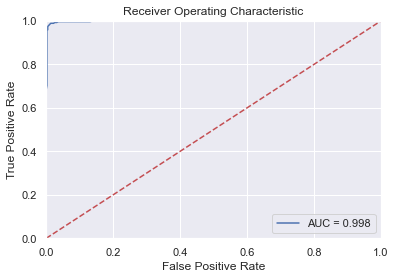

In [79]:
from sklearn import metrics
probs_train = model_rf.predict_proba(X_train)
preds_train = probs_train[:,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_train, preds_train)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.3f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
print(fpr_train)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00225734 0.00225734 0.00225734 0.00225734
 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734
 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734
 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734 0.00225734
 0.00225734 0.00225734 0.00225734 0.00225734 0.00451467 0.00451467
 0.00451467 0.00451467 0.01354402 0.01805869 0.02257336 0.0248307
 0.03160271 0.03611738 0.03837472 0.04288939 0.04740406 0.06546275
 0.06997743 0.07674944 0.08577878 0.08803612 0.0993228  0.11286682
 0.11738149 0.12189616 0.13092551 0.13995485 0.14446953 0.15575621
 0.15801354 0.17607223 0.17832957 0.18735892 0.18961625 0.20090293
 0.23702032 0.23927765 0.26185102 0.26636569 0.2731377  0.27765237
 0.30248307 0.30699774 0.356

In [81]:
print(tpr_train)

[0.         0.18959108 0.19330855 0.28624535 0.2936803  0.37918216
 0.3866171  0.44237918 0.48698885 0.51301115 0.53531599 0.54275093
 0.55018587 0.55390335 0.57620818 0.57992565 0.59851301 0.60223048
 0.62453532 0.63197026 0.64684015 0.65799257 0.66171004 0.67286245
 0.6802974  0.68401487 0.70260223 0.72490706 0.73234201 0.75092937
 0.75464684 0.76208178 0.76579926 0.7732342  0.77695167 0.78438662
 0.80297398 0.82527881 0.82899628 0.84386617 0.84758364 0.86245353
 0.87360595 0.87732342 0.88847584 0.89591078 0.89962825 0.9070632
 0.92565056 0.9330855  0.94795539 0.95539033 0.95910781 0.96282528
 0.97026022 0.9739777  0.98884758 0.98884758 0.98884758 0.99256506
 0.99256506 0.99628253 0.99628253 0.99628253 0.99628253 0.99628253
 0.99628253 0.99628253 0.99628253 0.99628253 0.99628253 0.99628253
 0.99628253 0.99628253 0.99628253 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

In [82]:
threshold_train

array([2.        , 1.        , 0.99166667, 0.99      , 0.9875    ,
       0.98      , 0.975     , 0.97      , 0.96      , 0.95      ,
       0.94      , 0.93150649, 0.93      , 0.925     , 0.92      ,
       0.91679293, 0.91      , 0.90233333, 0.9       , 0.89      ,
       0.88      , 0.87      , 0.86      , 0.85      , 0.84      ,
       0.83416667, 0.83258586, 0.83      , 0.82      , 0.81      ,
       0.8       , 0.79      , 0.78      , 0.77      , 0.76733333,
       0.76      , 0.74      , 0.72      , 0.71375   , 0.71      ,
       0.7075    , 0.7       , 0.69      , 0.68416667, 0.68      ,
       0.67      , 0.66      , 0.65      , 0.64      , 0.63      ,
       0.62      , 0.6       , 0.59816667, 0.59      , 0.58      ,
       0.55      , 0.44516667, 0.43      , 0.4       , 0.39466667,
       0.34479293, 0.34047619, 0.3327381 , 0.33      , 0.305     ,
       0.26      , 0.255     , 0.25      , 0.24      , 0.235     ,
       0.23      , 0.21      , 0.19725   , 0.19      , 0.18   

In [83]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,preds_train))

0.9984769273372662


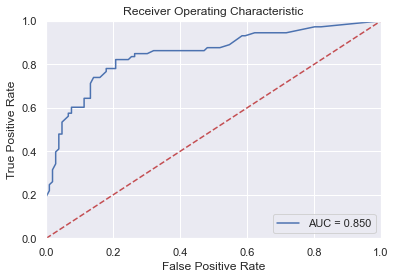

In [84]:
from sklearn import metrics
probs_test = model_rf.predict_proba(X_test)
preds_test = probs_test[:,1]
fpr_test, tpr_test, threshold_test = metrics.roc_curve(y_test, preds_test)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC = %0.3f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

__For the tuned model__

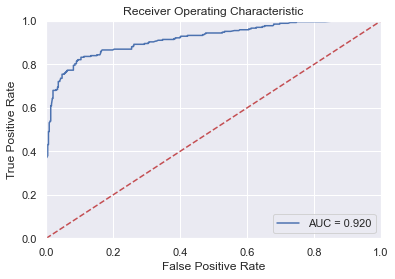

In [85]:
from sklearn import metrics
probs_train_tuned = model_rf_tuned.predict_proba(X_train)
preds_train_tuned = probs_train_tuned[:,1]
fpr_train_tuned, tpr_train_tuned, threshold_train_tuned = metrics.roc_curve(y_train, preds_train_tuned)
roc_auc_train_tuned = metrics.auc(fpr_train_tuned, tpr_train_tuned)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train_tuned, tpr_train_tuned, 'b', label = 'AUC = %0.3f' % roc_auc_train_tuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = section5.7></a>

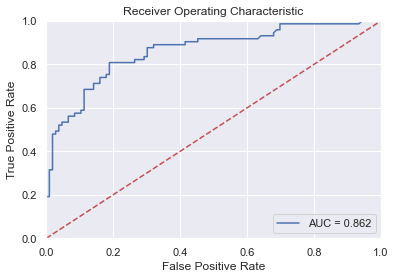

In [86]:
from sklearn import metrics
probs_test_tuned = model_rf_tuned.predict_proba(X_test)
preds_test_tuned = probs_test_tuned[:,1]
fpr_test_tuned, tpr_test_tuned, threshold_test_tuned = metrics.roc_curve(y_test, preds_test_tuned)
roc_auc_test_tuned = metrics.auc(fpr_test_tuned, tpr_test_tuned)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test_tuned, tpr_test_tuned, 'b', label = 'AUC = %0.3f' % roc_auc_test_tuned)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = section6></a>

# 6.0 Cross Validation

In [87]:
model_rf_tuned_new

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 6),
                                        'max_features': ['sqrt', 'log2', 5],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(6, 11),
                                        'n_estimators': [100, 400]},
                   scoring='precision')

In [88]:
from sklearn.model_selection import cross_validate

In [100]:
cv_results_rf = cross_validate(model_rf_tuned_new, X_train, y_train, cv=5, scoring='precision')

In [101]:
cv_results_rf

{'fit_time': array([40.74586701, 42.21517682, 40.615062  , 39.23977685, 42.20852971]),
 'score_time': array([0.01021409, 0.00820231, 0.00993514, 0.03005719, 0.03384233]),
 'test_score': array([0.83333333, 0.96428571, 0.96774194, 0.97058824, 0.90322581])}

In [102]:
cv_results_rf['test_score']

array([0.83333333, 0.96428571, 0.96774194, 0.97058824, 0.90322581])

In [110]:
cv_results_rf['test_score'].mean()

0.9278350049697298

In [103]:
cv_results_rf['test_score'].std()

0.05345135098320047

In [112]:
cv_results_rf['test_score'].std()/cv_results_rf['test_score'].mean()

0.057608681173808796

In [104]:
# Precision
precision_tuned_new = precision_score(y_test,y_pred_test_rf_tuned_new)
print('Precision score for Precision tuned model for test data:', precision_tuned_new)

Precision score for Precision tuned model for test data: 0.8947368421052632


## Using Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [117]:
model_lr = LogisticRegression()

In [118]:
cv_results_lr = cross_validate(model_lr, X_train, y_train, cv=5, scoring='precision')

In [119]:
cv_results_lr

{'fit_time': array([0.04983306, 0.03899121, 0.0366838 , 0.03767967, 0.02485704]),
 'score_time': array([0.00333595, 0.00369978, 0.0038023 , 0.00289011, 0.00328612]),
 'test_score': array([0.69811321, 0.79545455, 0.73584906, 0.81132075, 0.74468085])}

In [120]:
cv_results_lr['test_score'].mean()

0.75708368307726

In [121]:
cv_results_lr['test_score'].std()

0.04122193495530179